In [34]:
from simulate import simulate
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import seaborn as sns
import os
import shutil
sns.set_theme()

In [2]:
SIMTIME = 12
NUMF = 20

df = pd.DataFrame()

pd.concat([df, simulate(SIMTIME, NUMF, 0.3)], ignore_index=True)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q19,Q20,sim_time,forget_threshold,num_facts,model_sof,c,s,F,t0
0,0.355078,0.282031,0.153516,0.226953,0.225391,0.374219,0.264844,0.299609,0.335938,0.349219,...,0.275,0.285156,12.0,-0.8,20.0,0.3,0.25,0.3,1.0,0.3


In [3]:
SIMTIME = 12
NUMFACTS = 20
NUMREPS = 10
s = 0.3
c = 0.25

df = pd.DataFrame()
for msof in [x / 100 for x in range(20, 50)]:
    for _ in range(NUMREPS):
        df = pd.concat([df, simulate(SIMTIME, NUMFACTS, msof, c, s,)], ignore_index=True)

df.to_csv("dataanalysis\data\S\\0.2")


for index, row in df.iterrows():
    plt.scatter([row["model_sof"] for _ in range(NUMFACTS)], row[0:NUMFACTS])

plt.show()

## Effect of non-decision time $t_0$

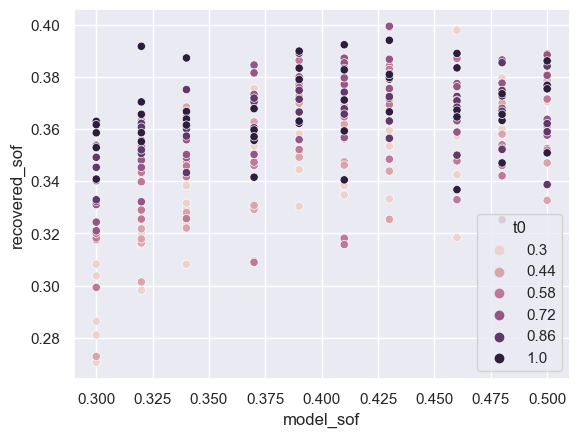

In [42]:
SIMTIME = 15
NUMFACTS = 20
NUMREPS = 5
s = 0.3
c = 0.25

df = pd.DataFrame()
for msof in [round(x,2) for x in np.linspace(0.3, 0.5, 10)]:
    for tzero in [round(x, 2) for x in np.linspace(0.3, 1, 6)]:
        for _ in range(NUMREPS):
            df = pd.concat([df, simulate(SIMTIME, NUMFACTS, msof, c, s, t0=tzero)], ignore_index=True)

df['recovered_sof'] = df.iloc[:,1:20].mean(axis=1)
#df.to_csv("dataanalysis\data\S\\0.2")

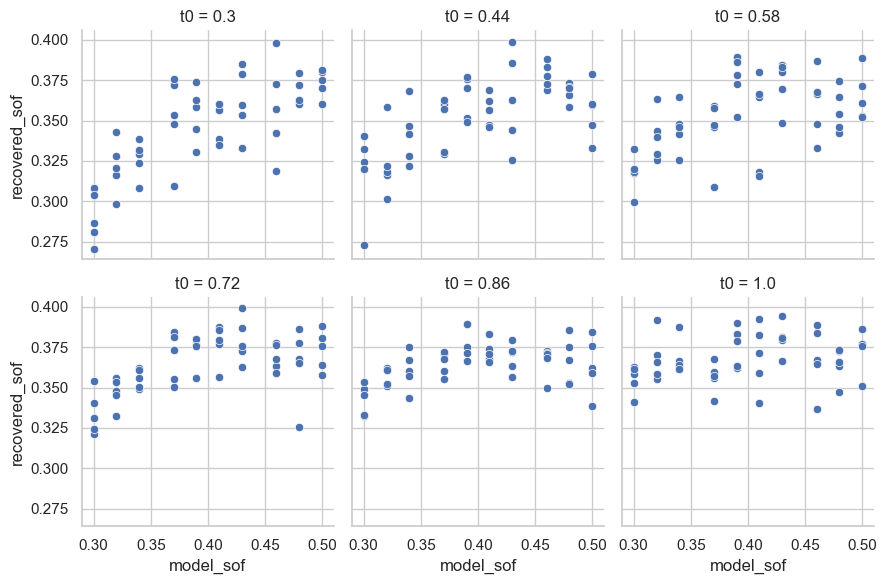

In [47]:
sns.set_style("whitegrid")
g = sns.FacetGrid(df, col="t0", col_wrap=3)
g.map(sns.scatterplot, "model_sof", "recovered_sof")
plt.show()

## Effect of Latency Factor $F$

In [50]:
SIMTIME = 15
NUMFACTS = 20
NUMREPS = 5
s = 0.3
c = 0.25

df = pd.DataFrame()
for msof in [round(x,2) for x in np.linspace(0.3, 0.5, 10)]:
    for myf in [round(x, 2) for x in np.linspace(0.5, 1.5, 6)]:
        for _ in range(NUMREPS):
            df = pd.concat([df, simulate(SIMTIME, NUMFACTS, msof, c, s, F=myf)], ignore_index=True)

df['recovered_sof'] = df.iloc[:,1:20].mean(axis=1)

#df.to_csv("dataanalysis\data\S\\0.2")

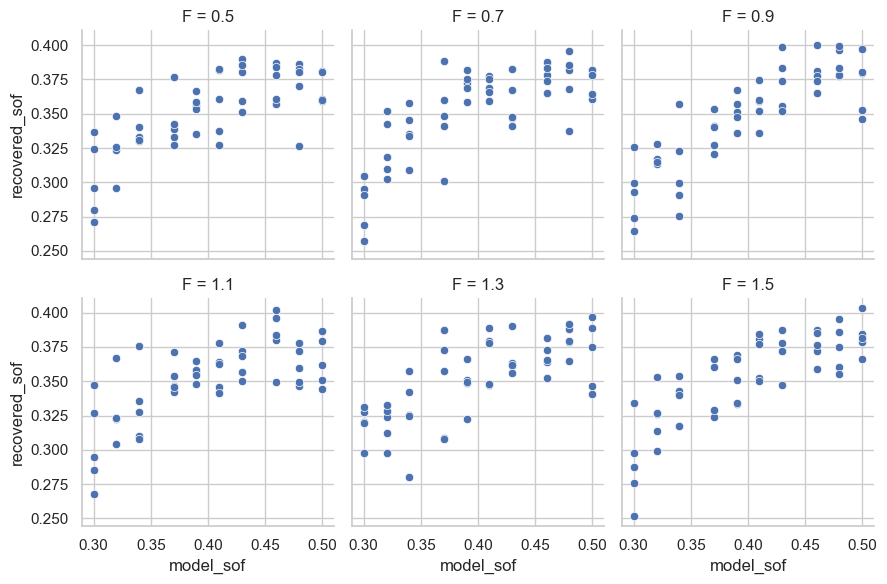

In [67]:
sns.set_style("whitegrid")
g = sns.FacetGrid(df, col="F", col_wrap=3)
g.map(sns.scatterplot, "model_sof", "recovered_sof")
plt.show()

## Effect of Retrieval Threshold $\tau$

In [ ]:
SIMTIME = 15
NUMFACTS = 20
NUMREPS = 5
s = 0.3
c = 0.25

df = pd.DataFrame()
for msof in [round(x,2) for x in np.linspace(0.3, 0.5, 10)]:
    for myt in [round(x, 2) for x in np.linspace(0.5, 1.5, 6)]:
        for _ in range(NUMREPS):
            df = pd.concat([df, simulate(SIMTIME, NUMFACTS, msof, c, s, F=myf)], ignore_index=True)

df['recovered_sof'] = df.iloc[:,1:20].mean(axis=1)

#df.to_csv("dataanalysis\data\S\\0.2")

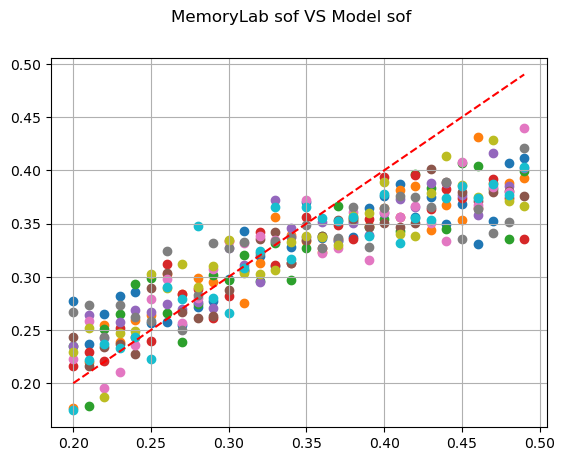

In [ ]:
df = pd.read_csv("dataanalysis\data\practdata")
l = []

for index, row in df.iterrows():
    
    facts = row[1:int(row["num_facts"] + 1)]
    facts = [x for x in facts if x != 0.3]
    avg = sum(facts) / len(facts)
    plt.scatter(row["model_sof"], avg)

plt.plot([x / 100 for x in range(20, 50)], [x / 100 for x in range(20, 50)], "--r")
plt.grid(True)
plt.suptitle("MemoryLab sof VS Model sof")
plt.show()
